In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

True
18
18


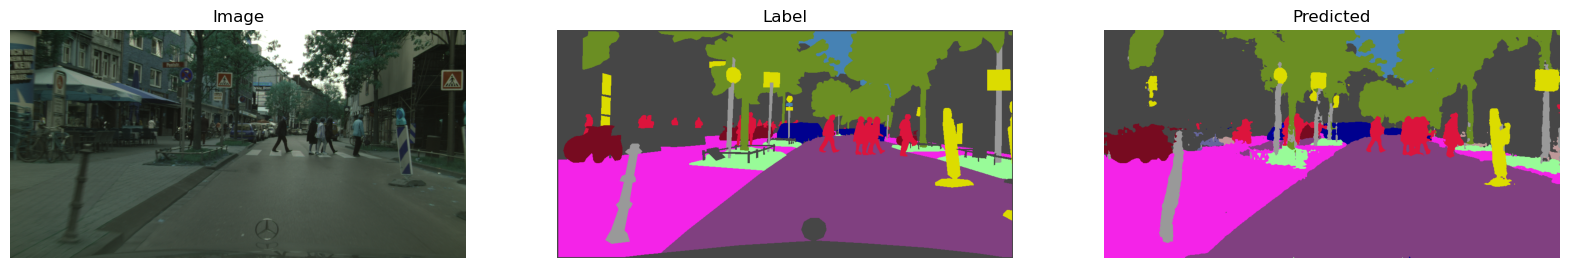

In [2]:

from pipeline.utils import *
import cv2
from matplotlib import pyplot as plt
rgb_image = cv2.imread("pipeline/data/input/aachen_000048_000019.png")
label = cv2.imread("pipeline/data/label/aachen_000048_000019.png",cv2.IMREAD_GRAYSCALE)
output= cv2.imread("pipeline/data/predicted/aachen_000048_000019.png",cv2.IMREAD_GRAYSCALE)
label[label==19]=2
cm_labels = (train_id_to_color[output]).astype(np.uint8)
output_pred = cm_labels[..., ::-1] # Rearrange channels to be  RGB as CV2 thinks train_id_to_color is BGR
output_pred=cv2.cvtColor(output_pred, cv2.COLOR_BGR2RGB)

label_pred= color_to_label_image(train_id_to_color[label],train_id_to_color) #Convert label_pred back to
print(np.all(label==label_pred))

print(np.max(label))
print(np.max(output))
# plot sample image
fig, axes = plt.subplots(1,3, figsize=(20,10))
axes[0].imshow(rgb_image);
axes[0].set_title("Image");
axes[0].axis('off');
axes[1].imshow(train_id_to_color[label]);
axes[1].set_title("Label");
axes[1].axis('off');
axes[2].imshow(output_pred);
axes[2].set_title("Predicted");
axes[2].axis('off');



In [3]:
from losses.dice_loss import *
pred=torch.load("pipeline/data/predicted/aachen_000000_000019.pt")
print(pred.shape)
label=torch.tensor(label,dtype=torch.int64)
tensor_label=label[None,:,:]
print(tensor_label.shape)
pred.to(device)
tensor_label.to(device)
criterion = DiceLoss()
loss=criterion(pred , tensor_label)

print(f"Dice Loss: {loss.item()}" )

/tmp/ipykernel_1981898/1539167842.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pred=torch.load("pipeline/data/predicted/aachen_000000_000019.pt")


torch.Size([1, 19, 512, 1024])
torch.Size([1, 512, 1024])
tensor([[[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],

         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
        

In [4]:
labels_one_hot = F.one_hot(tensor_label, num_classes=pred.shape[1])  # Shape: (N, H, W, C)
labels_one_hot = labels_one_hot.permute(0, 3, 1, 2)  # Shape: (N, C, H, W)
labels_one_hot=labels_one_hot*1000
loss2=criterion(labels_one_hot.float() , tensor_label)
print(labels_one_hot[0,:,:,:].max())

print(f"Dice Loss on Label: {loss2.item()}")

tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]],

         [[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ...